Generate top 5 actors based on count of movies(both original and licensed content) on Netflix 

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('netflix_titles.csv')

In [7]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [8]:
import datetime

In [24]:
data['added_year']=pd.to_datetime(data['date_added'])

In [25]:
data['added_year']=data['added_year'].dt.year

In [26]:
d=data.iloc[0]

In [33]:
d['release_year']==d['added_year']

True

In [40]:
data['content']=data['release_year']==data['added_year']

In [42]:
data['content']=data['content'].replace([True,False],['Original','Licensed'])

In [43]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,content
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,Original
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,Original
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,Licensed
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,Licensed
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,Licensed


In [47]:
tv=data[data['type']=='TV Show'].reset_index()

In [48]:
movie=data[data['type']=='Movie'].reset_index()

In [59]:
tv['country'].value_counts().head(5)

United States     705
United Kingdom    204
Japan             157
South Korea       147
India              71
Name: country, dtype: int64

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

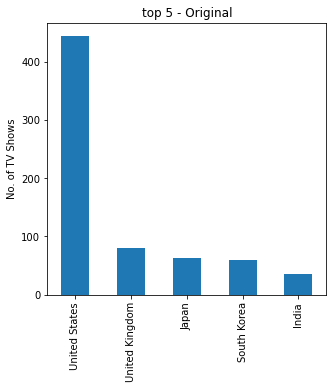

In [132]:
tv['country'][tv['content']=='Original'].value_counts().head(5).plot(kind='bar',figsize=(5,5))
plt.title('top 5 - Original')
plt.ylabel('No. of TV Shows')
plt.show()

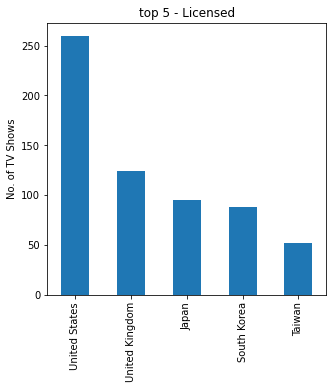

In [134]:
tv['country'][tv['content']=='Licensed'].value_counts().head(5).plot(kind='bar',figsize=(5,5))
plt.title('top 5 - Licensed')
plt.ylabel('No. of TV Shows')
plt.show()

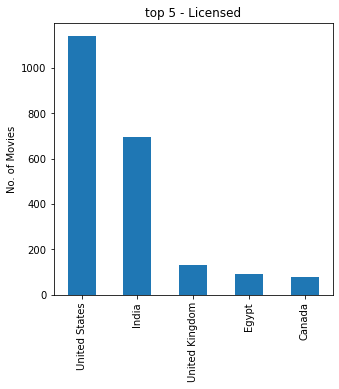

In [135]:
movie['country'][movie['content']=='Licensed'].value_counts().head(5).plot(kind='bar',figsize=(5,5))
plt.title('top 5 - Licensed')
plt.ylabel('No. of Movies')
plt.show()

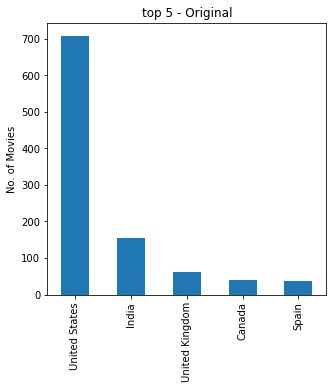

In [136]:
movie['country'][movie['content']=='Original'].value_counts().head(5).plot(kind='bar',figsize=(5,5))
plt.title('top 5 - Original')
plt.ylabel('No. of Movies')
plt.show()

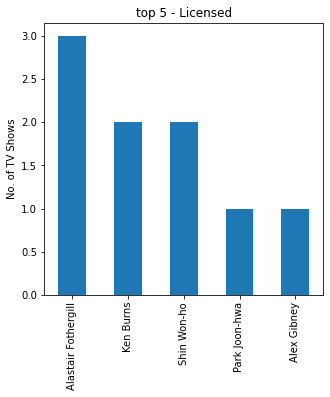

In [137]:
tv['director'][tv['content']=='Licensed'].value_counts().head(5).plot(kind='bar',figsize=(5,5))
plt.title('top 5 - Licensed')
plt.ylabel('No. of TV Shows')
plt.show()

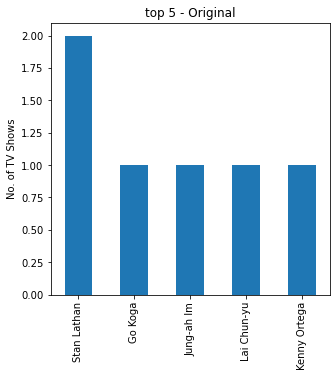

In [139]:
tv['director'][tv['content']=='Original'].value_counts().head(5).plot(kind='bar',figsize=(5,5))
plt.title('top 5 - Original')
plt.ylabel('No. of TV Shows')
plt.show()

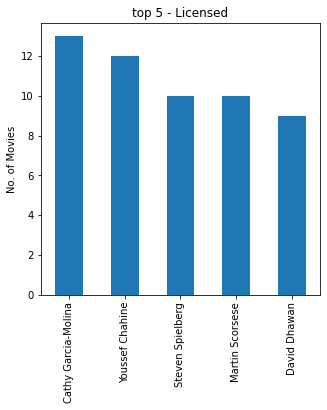

In [138]:
movie['director'][movie['content']=='Licensed'].value_counts().head(5).plot(kind='bar',figsize=(5,5))
plt.title('top 5 - Licensed')
plt.ylabel('No. of Movies')
plt.show()

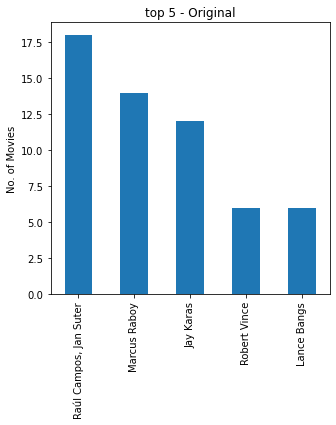

In [140]:
movie['director'][movie['content']=='Original'].value_counts().head(5).plot(kind='bar',figsize=(5,5))
plt.title('top 5 - Original')
plt.ylabel('No. of Movies')
plt.show()

In [245]:
l=list()
t=tv['cast'].dropna().reset_index()
t.drop('index',axis=1,inplace=True)
for i in range(0,len(t)):
    j=t['cast'][i].split(',')
    l.extend(j)

In [244]:
from collections import Counter 

In [247]:
Counter(l)

Counter({'João Miguel': 1,
         ' Bianca Comparato': 1,
         ' Michel Gomes': 1,
         ' Rodolfo Valente': 1,
         ' Vaneza Oliveira': 1,
         ' Rafael Lozano': 1,
         ' Viviane Porto': 1,
         ' Mel Fronckowiak': 1,
         ' Sergio Mamberti': 1,
         ' Zezé Motta': 1,
         ' Celso Frateschi': 1,
         'Erdal Beşikçioğlu': 2,
         ' Yasemin Allen': 1,
         ' Melis Birkan': 2,
         ' Saygın Soysal': 2,
         ' Berkan Şal': 2,
         ' Metin Belgin': 1,
         ' Ayça Eren': 2,
         ' Selin Uludoğan': 1,
         ' Özay Fecht': 1,
         ' Suna Yıldızoğlu': 1,
         'Robert Więckiewicz': 1,
         ' Maciej Musiał': 1,
         ' Michalina Olszańska': 1,
         ' Andrzej Chyra': 1,
         ' Clive Russell': 2,
         ' Zofia Wichłacz': 2,
         ' Edyta Olszówka': 1,
         ' Mateusz Kościukiewicz': 1,
         ' Ewa Błaszczyk': 1,
         ' Vu Le Hong': 1,
         ' Tomasz Włosok': 1,
         ' Krzysztof Wa

In [251]:
d = Counter(l) 
cast_tv=pd.DataFrame(d.items(), columns=['Cast', 'Count'])

In [254]:
cast_tv.sort_values(by=['Count'],ascending = False).head(5)

,Cast,Count
51,Takahiro Sakurai,22
374,Ai Kayano,16
1073,Junichi Suwabe,15
1035,Yuki Kaji,15
984,Daisuke Ono,13


In [255]:
l1=list()
t1=movie['cast'].dropna().reset_index()
t1.drop('index',axis=1,inplace=True)
for i in range(0,len(t1)):
    j1=t1['cast'][i].split(',')
    l1.extend(j1)

In [256]:
d1 = Counter(l1) 
cast_movie=pd.DataFrame(d1.items(), columns=['Cast', 'Count'])

In [257]:
cast_movie.sort_values(by=['Count'],ascending = False).head(5)

,Cast,Count
1055,Anupam Kher,37
1813,Om Puri,27
3164,Shah Rukh Khan,27
586,Boman Irani,25
2028,Paresh Rawal,24
